In [1]:
# Matrix (2D Grid)
grid = [[0, 0, 0, 0],
        [1, 1, 0, 0],
        [0, 0, 0, 1],
        [0, 1, 0, 0]]

# Count paths (backtracking)
def dfs(grid, r, c, visit):
    ROWS, COLS = len(grid), len(grid[0])
    if (min(r, c) < 0 or
        r == ROWS or c == COLS or
        (r, c) in visit or grid[r][c] == 1):
        return 0
    if r == ROWS - 1 and c == COLS - 1:
        return 1

    visit.add((r, c))


    count = 0
    count += dfs(grid, r + 1, c, visit)
    count += dfs(grid, r - 1, c, visit)
    count += dfs(grid, r, c + 1, visit)
    count += dfs(grid, r, c - 1, visit)

    visit.remove((r, c))
    return count

dfs(grid,0,0,set())


2

Number of Islands
Solved 
Given a 2D grid grid where '1' represents land and '0' represents water, count and return the number of islands.

An island is formed by connecting adjacent lands horizontally or vertically and is surrounded by water. You may assume water is surrounding the grid (i.e., all the edges are water).

Example 1:

Input: grid = [
    
    ["0","1","1","1","0"],

    ["0","1","0","1","0"],

    ["1","1","0","0","0"],

    ["0","0","0","0","0"]
  ]
Output: 1
Example 2:

Input: grid = [
    
    ["1","1","0","0","1"],
    
    ["1","1","0","0","1"],
    
    ["0","0","1","0","0"],
    
    ["0","0","0","1","1"]
  ]
Output: 4
Constraints:

1 <= grid.length, grid[i].length <= 100
grid[i][j] is '0' or '1'.

In [6]:
from typing import List
class Solution:
    def numIslands(self, grid: List[List[str]]) -> int:
        directions = [[1, 0], [-1, 0], [0, 1], [0, -1]]
        ROWS, COLS = len(grid), len(grid[0])
        islands = 0

        def dfs(r, c):
            if (r < 0 or c < 0 or r >= ROWS or
                c >= COLS or grid[r][c] == "0"
            ):
                return

            grid[r][c] = "0"
            for dr, dc in directions:
                dfs(r + dr, c + dc)

        for r in range(ROWS):
            for c in range(COLS):
                if grid[r][c] == "1":
                    dfs(r, c)
                    islands += 1

        return islands
    
grid = [
    
    ["0","1","1","1","0"],

    ["0","1","0","1","0"],

    ["1","1","0","0","0"],

    ["0","0","0","0","0"]
  ]


Solution().numIslands(grid)

1

Max Area of Island
Solved 
You are given a matrix grid where grid[i] is either a 0 (representing water) or 1 (representing land).

An island is defined as a group of 1's connected horizontally or vertically. You may assume all four edges of the grid are surrounded by water.

The area of an island is defined as the number of cells within the island.

Return the maximum area of an island in grid. If no island exists, return 0.

Example 1:
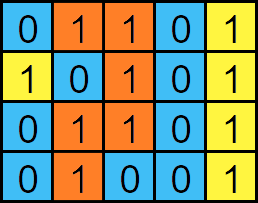


Input: grid = [

  [0,1,1,0,1],
  
  [1,0,1,0,1],
  
  [0,1,1,0,1],
  
  [0,1,0,0,1]
]

Output: 6
Explanation: 1's cannot be connected diagonally, so the maximum area of the island is 6.

Constraints:

1 <= grid.length, grid[i].length <= 50

In [8]:
class Solution:
    def maxAreaOfIsland(self, grid: List[List[int]]) -> int:
        ROWS, COLS = len(grid), len(grid[0])
        visit = set()

        def dfs(r, c):
            if (r < 0 or r == ROWS or c < 0 or
                c == COLS or grid[r][c] == 0 or
                (r, c) in visit
            ):
                return 0
            visit.add((r, c))
            return (1 + dfs(r + 1, c) +
                        dfs(r - 1, c) +
                        dfs(r, c + 1) +
                        dfs(r, c - 1))

        area = 0
        for r in range(ROWS):
            for c in range(COLS):
                area = max(area, dfs(r, c))
        return area
    